In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from random import randint
import math
import cmath

In [2]:
#define kets and bras
ket_0 = np.array([1,0]) # |up>
ket_1 = np.array([0,1]) # |down>

In [3]:
#define outer products for operators
c00 = np.outer(ket_0, ket_0)
c01 = np.outer(ket_0, ket_1)
c10 = np.outer(ket_1, ket_0)
c11 = np.outer(ket_1, ket_1)

In [4]:
def discrete_qw(N, coin, c_0):
    """Discrete time quantum walk with number of steps N, taking the coin operator C and the initial coin state. Returns a plot of the probabilities""" 
    
    P = 2*N+1 
    c, d = coin
    right = np.roll(np.eye(P), 1, axis=0)
    left = np.roll(np.eye(P), -1, axis=0)

    #S = np.kron(right, c00) + np.kron(left, c11)
    S = np.kron(left, c00) + np.kron(right, c11)
    U = S.dot(np.kron(np.eye(P), c))

    #initialising position and coin states 
    posn_0 = np.zeros(P)
    posn_0[N] = 1
    psi_0 = np.kron(posn_0, c_0)

    #evolution after N steps
    psi_N = np.linalg.matrix_power(U, N).dot(psi_0)

    #make measurement 
    probs = np.empty(P)
    for i in range(P):
        posn = np.zeros(P)
        posn[i] = 1

        M_i = np.kron(np.outer(posn, posn), np.eye(2))
        m = M_i.dot(psi_N)
        probs[i] = m.dot(m.conjugate()).real
    
    #plot probability distribution
    f1 = plt.figure()
    plt.plot(np.arange(P), probs)
    t = 'Discrete time Quantum Walk for %d steps - ' % N
    plt.title(t + d)
    f1.show

In [5]:
def split_step_qw(N, coin_1, coin_2):
    """Split step quantum walk with number of steps N, taking two coin operators for two parameters. Returns a plot of the probabilities""" 
    #NOT WORKING YET
    
    P = 2*N+1 
    c1, d1 = coin_1
    c2, d2 = coin_2
    right = np.roll(np.eye(P), 1, axis=0)
    left = np.roll(np.eye(P), -1, axis=0)
    stat = np.roll(np.eye(P), 0, axis=0)

    #S = np.kron(right, c00) + np.kron(left, c11)
    S_minus = np.kron(left, c00) + np.kron(stat , c11)
    S_plus = np.kron(stat, c00) + np.kron(right, c11)
    # U = SC
    # W = S+C2 S_C1
    U1 = S_plus.dot(np.kron(np.eye(P), c2))
    U2 = S_minus.dot(np.kron(np.eye(P), c1))
    U = np.dot(U1,U2)

    #initialising position and coin states 
    posn_0 = np.zeros(P)
    posn_0[N] = 1
    c_0 = (1/np.sqrt(2))*(ket_0 + ket_1*1j) 
    psi_0 = np.kron(posn_0, c_0)

    #evolution after N steps
    psi_N = np.linalg.matrix_power(U, N).dot(psi_0)

    #make measurement 
    probs = np.empty(P)
    for i in range(P):
        posn = np.zeros(P)
        posn[i] = 1

        M_i = np.kron(np.outer(posn, posn), np.eye(2))
        m = M_i.dot(psi_N)
        probs[i] = m.dot(m.conjugate()).real
    
    #plot probability distribution
    f1 = plt.figure()
    plt.plot(np.arange(P), probs)
    t = 'Split Step Quantum Walk for %d steps' % N
    plt.title(t)
    f1.show

In [6]:
def hadamard_coin(): 
    d = 'Hadamard Coin'
    return (1/np.sqrt(2))*(c00 + c01 + c10 - c11), d

In [7]:
def rotation_coin(theta):
    a00 = math.cos(theta)
    a01 = -1j*math.sin(theta)
    a10 = -1j*math.sin(theta)
    a11 = math.cos(theta)
    d = 'Rotation Coin, theta = ' + str(round(theta/np.pi,3)) + 'pi'
    return np.array([[a00, a01],[a10, a11]]), d

In [8]:
def identity_coin():
    d = 'Identity Coin'
    return np.eye(2), d 

def ant_identity_coin():
    d = 'Anti-Identity Coin'
    return [[0,1],[1,0]], d

In [9]:
def balanced_coin():
    d = 'Balanced Coin'
    return (1/np.sqrt(2))*(c00 + 1j*c01 + 1j*c10 + c11), d

In [10]:
sym_coin_state = (1/np.sqrt(2))*(ket_0 + ket_1*1j) 

In [11]:
unsym_coin_state = ket_0

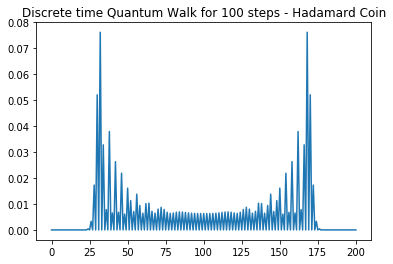

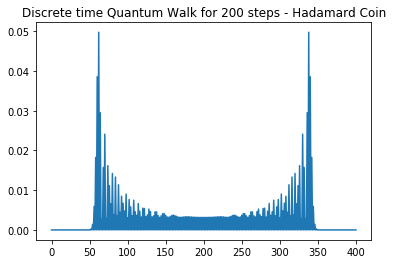

In [12]:
discrete_qw(100, hadamard_coin(), sym_coin_state)
discrete_qw(200, hadamard_coin(), sym_coin_state)

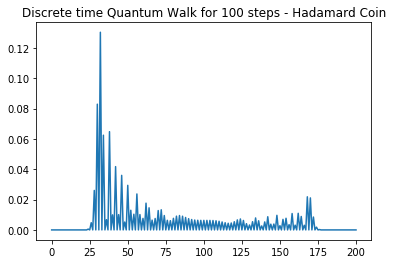

In [18]:
discrete_qw(100, hadamard_coin(), unsym_coin_state)

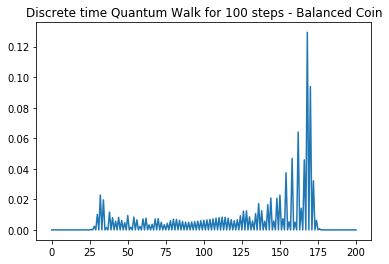

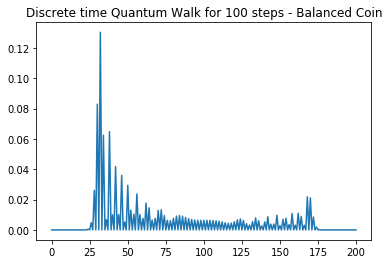

In [13]:
discrete_qw(100, balanced_coin(), sym_coin_state)
discrete_qw(100, balanced_coin(), unsym_coin_state)

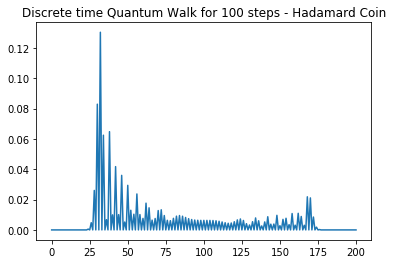

In [14]:
discrete_qw(100, hadamard_coin(), unsym_coin_state)

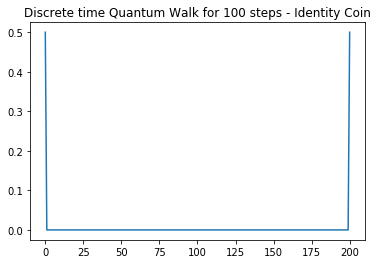

In [15]:
discrete_qw(100, identity_coin(), sym_coin_state)

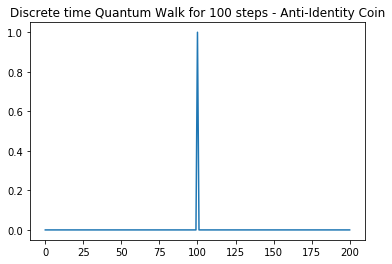

In [16]:
discrete_qw(100, ant_identity_coin(), sym_coin_state)

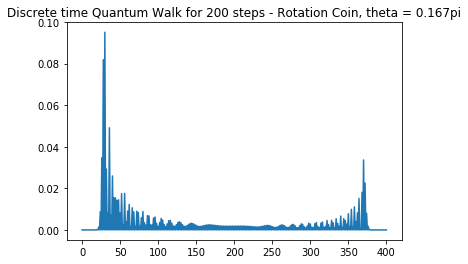

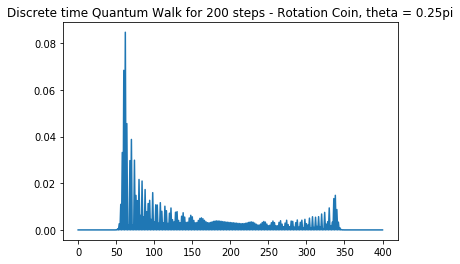

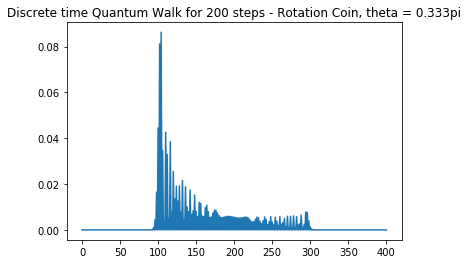

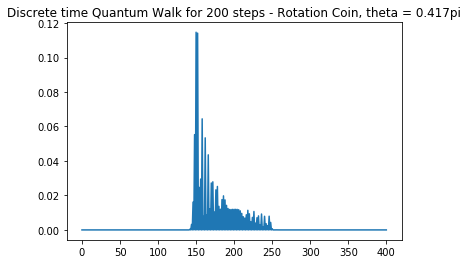

In [17]:
#recreating machine learning paper 
# https://arxiv.org/pdf/2007.04572.pdf

discrete_qw(200, rotation_coin((1/6)*np.pi), sym_coin_state)
discrete_qw(200, rotation_coin((1/4)*np.pi), sym_coin_state)
discrete_qw(200, rotation_coin((1/3)*np.pi), sym_coin_state)
discrete_qw(200, rotation_coin((5/12)*np.pi), sym_coin_state)

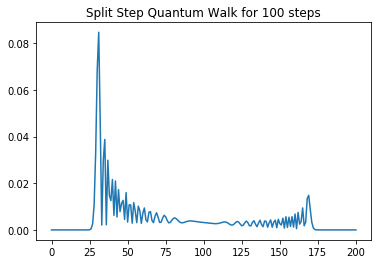

In [19]:
split_step_qw(100, rotation_coin((1/4)*np.pi), rotation_coin((1/4)*np.pi))